<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2003%20-%20Runge%20Kutta/Supplementary/02_RK%20Mid%20point%20Example%20-%20Review%20Question%207b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Sheet 3 Question 6 Blank

## Heun’s second order Runge-Kutta method 


Thus Heun's second order Runge-Kutta for the initial value problem
\begin{equation}y'=f(t,y)\end{equation}
with the initial condition $y(t_0)=\alpha$ is given by
\begin{equation}w_0=\alpha, \end{equation}
\begin{equation}w_{i+1}=w_i+\frac{h}{2}[f(t_i,w_i)+f(t_i+h,y_i+hf(t_i,w_i))] \end{equation}
with an error of order $O(h^2)$.

For ease of calculation this can be rewritten as:
\begin{equation}k_1=f(t_i,w_i),\end{equation}
\begin{equation}k_2=f(t_i+h,w_i+hk_1),\end{equation}
\begin{equation}w_{i+1}=w_i+\frac{h}{2}[k_1+k_2]. \end{equation}


In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

## The Equation

\begin{equation}   \tau_m\frac{dV}{dt} = -(V-E_L) + R_mI(t), \ \ -50\leq t \leq 400, \end{equation}

where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t)=0.01t$
and the initial condition
$V(-50) = -75$ using a stepsize of $h=0.5$.
    
    
## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised with stepsize $h=0.5$ gives
\begin{equation} 
N=\frac{b-a}{h}.
\end{equation}
Here the N is $-50\leq t \leq 400$ 
\begin{equation}
 N=\frac{400--50}{0.5}=900,
\end{equation}
this gives the 901 discrete points:
\begin{equation}
 t_0=-400, \ t_1=-399.5, \ ... t_{900}=400. 
\end{equation}
This is generalised to 
\begin{equation}
t_i=-50+i0.1, \ \ \ i=0,1,...,900.
\end{equation}
The plot below shows the discrete time steps.

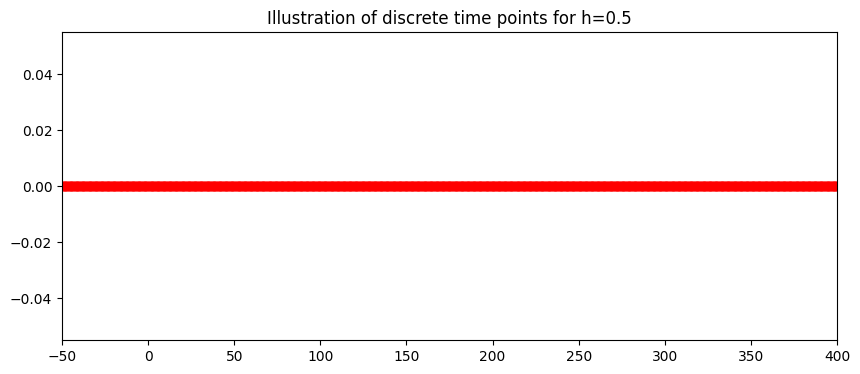

In [2]:
### Setting up time
a=-50
b=400
h=0.5


N=int((b-a)/(h))
time=np.arange(a,b+h/2,h)
fig = plt.figure(figsize=(10,4))
plt.plot(time,0*time,'o:',color='red')
plt.xlim((a,b))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## Specific Huen Method
The 2nd order method is given by
\begin{equation}w_{i+1}=w_i+\frac{h}{2}[f(t_i,w_i)+f(t_i+h,y_i+hf(t_i,w_i))] \end{equation}
with an error of order $O(h^2)$.

For ease of calculation this can be rewritten as:
\begin{equation}k_1=f(t_i,w_i)=\frac{-(w_i-E_L) + R_mI(t_i)}{\tau_m},\end{equation}
\begin{equation}k_2=f(t_i+h,w_i+hk_1)=\frac{-(w_i+hk_1-E_L) + R_mI(t_i+h)}{\tau_m},\end{equation}
\begin{equation}w_{i+1}=w_i+\frac{h}{2}[k_1+k_2]. \end{equation}
for $i=0,1,...,899$ and
where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t_i)=0.01t_i$
and the initial condition
$V(t_0=-50) = -75$ using a stepsize of $h=0.5$.
Putting in the values the difference equation is 
\begin{equation}k1=\frac{-(w[i]+75) + 0.1*time[i]}{10},\end{equation}
\begin{equation}k2=\frac{-(w[i]+0.5*k1+75) + 0.1*(time[i]+0.5)}{10},\end{equation}
\begin{equation}w[i+1]=w[i]+\frac{h}{2}[k_1+k_2]. \end{equation}



In [3]:
def myfun_f(t,V):
    return 1

In [4]:
w=np.zeros(N+1)
w[0]=-75

for i in range (0,N):
    k1=myfun_f(x[i],w[i])
    k2=myfun_f(x[i]+h,w[i]+h*k1)
    w[i+1]=w[i]+h/2*(k1+k2)


NameError: name 'x' is not defined

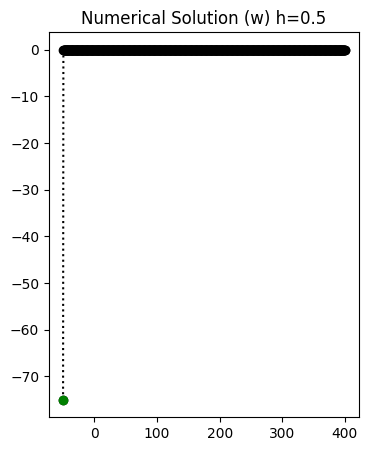

In [5]:
fig = plt.figure(figsize=(4,5))
# --- left hand plot
#ax = fig.add_subplot(1,4,1)
plt.plot(time,w,'o:',color='k')
plt.plot(time[0],w[0],'o',color='green')


#ax.legend(loc='best')
plt.title('Numerical Solution (w) h=%s'%(h))
plt.show()


In [6]:

d = {'time t_i': time,      'Heun (w_i) ':w}
df = pd.DataFrame(data=d)
df

,time t_i,Heun (w_i)
0,-50.0,-75.0
1,-49.5,0.0
2,-49.0,0.0
3,-48.5,0.0
4,-48.0,0.0
...,...,...
896,398.0,0.0
897,398.5,0.0
898,399.0,0.0
899,399.5,0.0
